In [1]:
#libraries used
from os import listdir
from os.path import join
import cv2
import pandas as pd
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D ,BatchNormalization,GlobalAveragePooling2D

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input as vgg16_pre

from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input as vgg19_pre

from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions

from keras.regularizers import l2 , l1
from keras import optimizers
from keras.optimizers import RMSprop, Adam
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
!unzip dataset.zip

In [ ]:
!ls

dataset  dataset.zip  sample_data


In [ ]:
angel_sleeve='dataset/angel_sleeve'
bell_sleeve='dataset/bell_sleeve'
bishop_sleeve='dataset/bishop_sleeve'
butterfly_sleeve='dataset/butterfly_sleeve'
cap_sleeve='dataset/cap_sleeve'
cape_sleeve='dataset/cape_sleeve'
cold_shoulder='dataset/cold-shoulder'
kimono_sleeve='dataset/kimono_sleeve'
long_sleeve='dataset/long_sleeve'
puff_sleeve='dataset/puff_sleeve'
short_sleeve='dataset/short_sleeve'
sleeveless='dataset/sleeveless'
thirtyfour_sleeve='dataset/34_sleeve'


In [ ]:
#data reading
data_labels = []
data_images = []
size =224,224
def image_read(file1,target_class):
        for file in os.listdir(file1):
                img = cv2.imread(os.path.join(file1,file))
                if(img is not None):
                    im = cv2.resize(img,size)
                    data_images.append(im)
                    data_labels.append(target_class)
image_read(angel_sleeve,0)     
image_read(bell_sleeve,1)
image_read(bishop_sleeve,2)
image_read(butterfly_sleeve,3)
image_read(cap_sleeve,4)
image_read(cape_sleeve,5)
image_read(cold_shoulder,6)
image_read(kimono_sleeve,7)
image_read(long_sleeve,8)
image_read(puff_sleeve,9)
image_read(short_sleeve,10)
image_read(sleeveless,11)
image_read(thirtyfour_sleeve,12)
data_images,data_labels=shuffle(data_images,data_labels)
data_final = np.array(data_images)


In [ ]:
data_final.shape

(2007, 224, 224, 3)

In [ ]:
#dataset flatten
train_flatten = data_final.reshape(data_final.shape[0], -1)
data_label=np.array(data_labels)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(train_flatten,data_label, test_size=0.10, random_state=42)

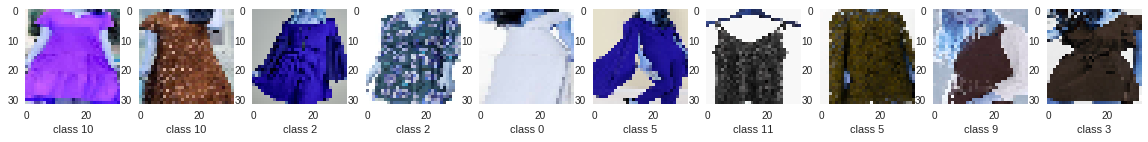

Label Encodings:
angel_sleeve       -> 0
bell_sleeve        -> 1
bishop_sleeve      -> 2
butterfly_sleeve   -> 3
cap_sleeve         -> 4
cape_sleeve        -> 5
cold_shoulder      -> 6
kimono_sleeve      -> 7
long_sleeve        -> 8
puff_sleeve        -> 9
short_sleeve       -> 10
sleeveless         -> 11
thirthyfour_sleeve -> 12


In [ ]:
#preview of images
plt.figure(figsize=(20,10))
x, y = 10, 1
for i in range(0,10):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape((32,32,3)),interpolation='nearest',cmap='Greys')
    plt.grid(None)
    plt.xlabel('class %d' %y_train[i])
plt.show()

print("Label Encodings:")

print("angel_sleeve       -> 0")
print("bell_sleeve        -> 1")
print("bishop_sleeve      -> 2")
print("butterfly_sleeve   -> 3")
print("cap_sleeve         -> 4")
print("cape_sleeve        -> 5")
print("cold_shoulder      -> 6")
print("kimono_sleeve      -> 7")
print("long_sleeve        -> 8")
print("puff_sleeve        -> 9")
print("short_sleeve       -> 10")
print("sleeveless         -> 11")
print("thirthyfour_sleeve -> 12")


Text(0.5, 1.0, 'Test Class')

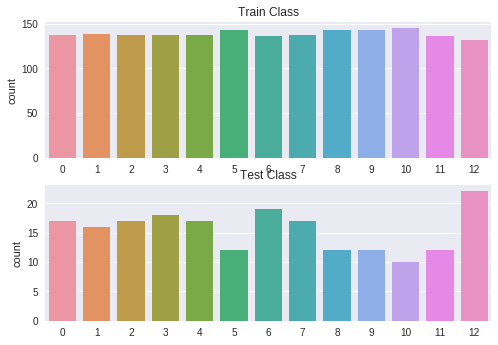

In [ ]:
#plotting output class
fig=plt.figure()
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)
sns.countplot(y_train,ax=ax1).set_title('Train Class')
sns.countplot(y_test,ax=ax2).set_title('Test Class')

In [ ]:
# Check the null values
np.isnan(x_train).sum() , np.isnan(x_test).sum() 

(0, 0)

In [ ]:
# Normalize the data
x_train=x_train / 255.0
x_test=x_test / 255.0

In [ ]:
#one hot encoding
y_train=to_categorical(y_train,13)
y_test=to_categorical(y_test,13)

In [ ]:
# Reshape image back to 3 dimensions 
x_train=x_train.reshape(-1,224,224,3)
x_test=x_test.reshape(-1,224,224,3)

In [ ]:
x_train.shape , x_test.shape, y_train.shape, y_test.shape

((1806, 224, 224, 3), (201, 224, 224, 3), (1806, 13), (201, 13))

IMAGE AUGMENTATION

In [ ]:
datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.5,  
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
datagen.fit(x_train)
test_datagen.fit(x_test)

#vgg16 Model

In [ ]:
x_train=vgg16_pre(x_train)
x_test=vgg16_pre(x_test)

In [ ]:
vgg16=VGG16(weights = 'imagenet', input_shape = (224,224,3),include_top = False)

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
for layer in vgg16.layers:
    layer.trainable = False

for layer in vgg16.layers:
    print(layer, layer.trainable)

In [ ]:
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(13, activation = 'softmax'))

In [ ]:
model.load_weights("weights_vgg16.hdf5")
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

checkpoint = ModelCheckpoint('weights_vgg16_imageaug.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
#hyper parameters
epochs=15
batch_size =64

In [ ]:
datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.5)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
datagen.fit(x_train)
test_datagen.fit(x_test)

In [ ]:
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),epochs = epochs, validation_data = (x_test,y_test), steps_per_epoch=x_train.shape[0] // batch_size, callbacks=callbacks_list)

Epoch 1/15
28/28 [==============================] - 28s 999ms/step - loss: 1.0342 - acc: 0.6747 - val_loss: 1.4772 - val_acc: 0.8905

Epoch 00001: val_acc improved from -inf to 0.89055, saving model to weights_vgg16_imageaug.hdf5
Epoch 2/15
28/28 [==============================] - 25s 900ms/step - loss: 0.9614 - acc: 0.7015 - val_loss: 1.6038 - val_acc: 0.9005

Epoch 00002: val_acc improved from 0.89055 to 0.90050, saving model to weights_vgg16_imageaug.hdf5
Epoch 3/15
28/28 [==============================] - 26s 917ms/step - loss: 0.9583 - acc: 0.6910 - val_loss: 1.8358 - val_acc: 0.8806

Epoch 00003: val_acc did not improve from 0.90050
Epoch 4/15
28/28 [==============================] - 26s 914ms/step - loss: 0.9121 - acc: 0.7022 - val_loss: 1.8332 - val_acc: 0.8856

Epoch 00004: val_acc did not improve from 0.90050
Epoch 5/15
28/28 [==============================] - 25s 906ms/step - loss: 0.8828 - acc: 0.7170 - val_loss: 1.8957 - val_acc: 0.8806

Epoch 00005: val_acc did not improv